In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime

import sklearn

from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics

mpl.rcParams['font.family'] = "serif"
mpl.rcParams['text.usetex'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['figure.figsize'] = (6,4)
plt.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]    

def y_by_x(self, y, x, width=1):
    ''' Group dataframe values y by values x binned by width. Default binning of x is 1.
    x and y can be column names or transformations interpretable by the eval method.  
    '''
    grps = self.eval(x).apply(lambda t: int(t/float(width))*float(width) if not pd.isna(t) else t) 
    values = self.eval(y)
    return values.groupby(grps)

pd.DataFrame.y_by_x = y_by_x

def plot_pd_series(series, **kwargs):
    plt.plot(series.index, series.values, **kwargs, marker='o')
    
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def str2datetime(date):
    
    """Return a datetime object from a string given as y-m-d"""
    
    date_tmp = date.split('-')
    
    y = int(date_tmp[0])
    m = int(date_tmp[1])
    d = int(date_tmp[2])
    
    return datetime.datetime(y,m,d)

In [2]:
injs = pd.read_csv('inj_data_final.csv')
injs.drop(columns=['Unnamed: 0','Opp','Team'],inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (104,113,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
injs.shape

(133072, 126)

In [4]:
enc = OneHotEncoder(sparse=False)
vals = enc.fit_transform(injs[['Position','Pos3','Shoots']])
cols = []
for cat in enc.categories_:
    cols = np.concatenate((cols,cat))
oneHot_cols = pd.DataFrame(vals,columns=cols)
injs = pd.concat((injs,oneHot_cols),axis=1)
injs.fillna(value=0,inplace=True) #Fill NaNs with 0
injs = injs.loc[injs['Name']!=0]

In [5]:
injs.drop(columns=['Position','Pos3','Shoots'],inplace=True)

In [6]:
col_dict = {}
col_dict['Was_Injured?'] = 'Was_Injured'

for c in injs.columns:
    strng = c.replace(' ','_')
    strng = strng.replace('.','')
    strng = strng.replace('%','_per')
    if strng != c:
        col_dict[c] = strng

injs.rename(columns=col_dict,inplace=True)    

In [7]:
for c in injs.columns:
    print(c)

Name
Height_[cm]
Weight_[kg]
Date
Age
Was_Injured
MP_Av7
FG_Av7
FGA_Av7
FG_per_Av7
3P_Av7
3PA_Av7
3P_per_Av7
FT_Av7
FTA_Av7
FT_per_Av7
ORB_Av7
DRB_Av7
TRB_Av7
AST_Av7
STL_Av7
BLK_Av7
TOV_Av7
PF_Av7
PTS_Av7
GmSc_Av7
+/-_Av7
N_games_7
MP_Av14
FG_Av14
FGA_Av14
FG_per_Av14
3P_Av14
3PA_Av14
3P_per_Av14
FT_Av14
FTA_Av14
FT_per_Av14
ORB_Av14
DRB_Av14
TRB_Av14
AST_Av14
STL_Av14
BLK_Av14
TOV_Av14
PF_Av14
PTS_Av14
GmSc_Av14
+/-_Av14
N_games_14
MP_Av21
FG_Av21
FGA_Av21
FG_per_Av21
3P_Av21
3PA_Av21
3P_per_Av21
FT_Av21
FTA_Av21
FT_per_Av21
ORB_Av21
DRB_Av21
TRB_Av21
AST_Av21
STL_Av21
BLK_Av21
TOV_Av21
PF_Av21
PTS_Av21
GmSc_Av21
+/-_Av21
N_games_21
MP_b2b
FG_b2b
FGA_b2b
FG_per_b2b
3P_b2b
3PA_b2b
3P_per_b2b
FT_b2b
FTA_b2b
FT_per_b2b
ORB_b2b
DRB_b2b
TRB_b2b
AST_b2b
STL_b2b
BLK_b2b
TOV_b2b
PF_b2b
PTS_b2b
GmSc_b2b
+/-_b2b
b2b
N_prev_injs
ann_inj_rate
W_Av_7
L_Av_7
Dist_Feet_Av_7
Dist_Miles_Av_7
Dist_Miles_Off_Av_7
Dist_Miles_Def_Av_7
Avg_Speed_Av_7
Avg_Speed_Off_Av_7
Avg_Speed_Def_Av_7
W_Av_14
L_Av_14
D

In [8]:
avg_inj_rate = injs.loc[injs['Was_Injured']==1].shape[0]/injs.shape[0]
print("Overall injury rate in the data set is {:.2f}%".format(avg_inj_rate*100))

Overall injury rate in the data set is 2.92%


In [9]:
injs.to_csv('inj_data_final_cleaned.csv')

## Count number of injuries in 2013-2014, 2014-2015 seasons

In [101]:
injs.sort_values(by=['Date','Name'],inplace=True)
injs.reset_index(drop=True,inplace=True)

In [96]:
injs_2013_2015 = injs.iloc[:37938] #Magic number found by guess and check

In [97]:
N_injs = injs_2013_2015.loc[injs_2013_2015['Was_Injured']==1].shape[0]
inj_rate = N_injs/injs_2013_2015.shape[0]

print("Injury rate is {:.3f}%".format(inj_rate*100))

Injury rate is 2.607%


## Add additional column such that a game is associated with an injury if an injury occurred within 7 days of the game

In [98]:
inj_list = pd.read_csv('nba_injs_2010-2020.csv')
inj_list.sort_values(by=['Date','Relinquished'])

,Unnamed: 0,index,Date,Team,Acquired,Relinquished,Notes
0,0,0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,1,1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2,2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,3,3,2010-10-08,Blazers,NaN,Jeff Pendergraph,torn ACL in right knee (out indefinitely)
4,4,4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)
5,5,7,2010-10-09,Nuggets,NaN,Al Harrington,partially torn plantar fascia in left foot (ou...
6,6,9,2010-10-12,Kings,NaN,Samuel Dalembert,strained left groin (out indefinitely)
7,7,10,2010-10-17,Bobcats,NaN,Dominic McGuire,stress fracture in left shin (out indefinitely)
8,8,12,2010-10-19,Suns,NaN,Josh Childress,fractured right index finger (out indefinitely)
9,9,14,2010-10-25,Thunder,NaN,Nick Collison,left knee injury (out indefinitely)


In [99]:
inj_list_2013 = inj_list.iloc[4532:].reset_index(drop=True) #Magic number found by guess and check
inj_list_2013.head(10)

,Unnamed: 0,index,Date,Team,Acquired,Relinquished,Notes
0,4532,5323,2013-09-18,Wizards,NaN,Emeka Okafor,herniated disc in neck (out indefinitely)
1,4533,5326,2013-09-27,Timberwolves,NaN,Chase Budinger,damaged cartilage in left knee (out indefinitely)
2,4534,5328,2013-10-08,Hawks,NaN,Gustavo Ayon,strained right rotator cuff (out indefinitely)
3,4535,5329,2013-10-10,Bobcats,NaN,Brendan Haywood,stress fracture in left foot (out indefinitely)
4,4536,5331,2013-10-10,Pistons,NaN,Rodney Stuckey,fractured right thumb (out indefinitely)
5,4537,5334,2013-10-12,Bobcats,NaN,Cody Zeller,appendectomy (out indefinitely)
6,4538,5335,2013-10-12,Jazz,NaN,Trey Burke,fractured right index finger (out indefinitely)
7,4539,5338,2013-10-15,Pistons,NaN,Brandon Jennings,impacted wisdom tooth (out indefinitely)
8,4540,5341,2013-10-28,Pacers,NaN,Danny Granger,strained left calf (out indefinitely)
9,4541,5345,2013-10-29,Cavaliers,NaN,Carrick Felix,sports hernia (out indefinitely)


In [105]:
names = injs.Name.unique()

In [111]:
inj_list_2013.shape

(9168, 7)

In [112]:
injs_list_clean = inj_list_2013[inj_list_2013['Relinquished'].isin(names)].reset_index(drop=True)

In [113]:
injs_list_clean

,Unnamed: 0,index,Date,Team,Acquired,Relinquished,Notes
0,4533,5326,2013-09-27,Timberwolves,NaN,Chase Budinger,damaged cartilage in left knee (out indefinitely)
1,4534,5328,2013-10-08,Hawks,NaN,Gustavo Ayon,strained right rotator cuff (out indefinitely)
2,4536,5331,2013-10-10,Pistons,NaN,Rodney Stuckey,fractured right thumb (out indefinitely)
3,4537,5334,2013-10-12,Bobcats,NaN,Cody Zeller,appendectomy (out indefinitely)
4,4538,5335,2013-10-12,Jazz,NaN,Trey Burke,fractured right index finger (out indefinitely)
5,4539,5338,2013-10-15,Pistons,NaN,Brandon Jennings,impacted wisdom tooth (out indefinitely)
6,4540,5341,2013-10-28,Pacers,NaN,Danny Granger,strained left calf (out indefinitely)
7,4546,5355,2013-10-29,Magic,NaN,Tobias Harris,sprained left ankle (DNP)
8,4547,5357,2013-10-29,Pacers,NaN,Danny Granger,placed on IL with strained left calf
9,4548,5361,2013-10-29,Warriors,NaN,Harrison Barnes,left foot injury (DNP)


In [117]:
injs

,Name,Height_[cm],Weight_[kg],Date,Age,Was_Injured,MP_Av7,FG_Av7,FGA_Av7,FG_per_Av7,...,Power_Forward_and_Small_Forward_and_Shooting_Guard,Shooting_Guard,Small_Forward,Small_Forward_and_Shooting_Guard,Big,Guard,Wing,Left,Left_Right,Right
0,Arron Afflalo,196,95,2013-10-30,28.041068,0.0,32.983333,3.000000,14.000000,0.214286,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,C.J. Watson,188,79,2013-10-30,29.536619,0.0,19.900000,2.000000,5.000000,0.400000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Chris Andersen,208,111,2013-10-30,35.314853,0.0,16.550000,3.000000,5.000000,0.600000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Chris Bosh,211,106,2013-10-30,29.602327,0.0,31.366667,6.000000,11.000000,0.545455,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Chris Kaman,213,120,2013-10-30,31.506502,0.0,19.666667,5.000000,10.000000,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,David West,206,113,2013-10-30,33.169747,0.0,30.716667,4.000000,11.000000,0.363636,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,E'Twaun Moore,190,86,2013-10-30,24.676249,0.0,25.750000,3.000000,6.000000,0.500000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,George Hill,190,85,2013-10-30,27.490075,1.0,29.066667,2.000000,8.000000,0.250000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,Ian Mahinmi,211,118,2013-10-30,26.982888,0.0,16.700000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,Jameer Nelson,183,86,2013-10-30,31.720055,0.0,30.566667,4.000000,13.000000,0.307692,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [191]:
assoc_inds = []
inj_names = injs_list_clean.Relinquished.unique()

for i,name in enumerate(inj_names):
    print("On index {:d}/{:d}, player is {:s}".format(i,len(inj_names),name))
    inj_list_tmp = injs_list_clean.loc[injs_list_clean['Relinquished']==name]
    injs_tmp = injs.loc[injs['Name'] == name]
    for i,row1 in inj_list_tmp.iterrows():
        inj_date = str2datetime(row1['Date'])
        for j,row2 in injs_tmp.iterrows():
            date = str2datetime(row2['Date'])
            delta = inj_date - date
            if (delta <= datetime.timedelta(days=7) and delta >= datetime.timedelta(days=0)) and not(j in assoc_inds):
                assoc_inds.append(j)

On index 0/527, player is Chase Budinger
On index 1/527, player is Gustavo Ayon
On index 2/527, player is Rodney Stuckey
On index 3/527, player is Cody Zeller
On index 4/527, player is Trey Burke
On index 5/527, player is Brandon Jennings
On index 6/527, player is Danny Granger
On index 7/527, player is Tobias Harris
On index 8/527, player is Harrison Barnes
On index 9/527, player is Otto Porter Jr.
On index 10/527, player is Luke Ridnour
On index 11/527, player is Dwyane Wade
On index 12/527, player is Ryan Kelly
On index 13/527, player is Andrei Kirilenko
On index 14/527, player is Wilson Chandler
On index 15/527, player is Ryan Anderson
On index 16/527, player is Quincy Acy
On index 17/527, player is Isaiah Canaan
On index 18/527, player is Robert Covington
On index 19/527, player is Terrence Jones
On index 20/527, player is Al Jefferson
On index 21/527, player is Brandon Knight
On index 22/527, player is George Hill
On index 23/527, player is Omri Casspi
On index 24/527, player is 

On index 199/527, player is Ian Mahinmi
On index 200/527, player is Arnett Moultrie
On index 201/527, player is James Anderson
On index 202/527, player is Andre Drummond
On index 203/527, player is Jonas Valanciunas
On index 204/527, player is Dwight Howard
On index 205/527, player is Marcin Gortat
On index 206/527, player is Nate Wolters
On index 207/527, player is Alec Burks
On index 208/527, player is Isaiah Thomas
On index 209/527, player is Brian Roberts
On index 210/527, player is Blake Griffin
On index 211/527, player is Josh McRoberts
On index 212/527, player is Kyle Lowry
On index 213/527, player is Dante Cunningham
On index 214/527, player is Kent Bazemore
On index 215/527, player is Reggie Evans
On index 216/527, player is Josh Smith
On index 217/527, player is Roy Hibbert
On index 218/527, player is Rajon Rondo
On index 219/527, player is Alan Anderson
On index 220/527, player is Chris Bosh
On index 221/527, player is Danilo Gallinari
On index 222/527, player is Serge Ibaka

On index 394/527, player is Taurean Prince
On index 395/527, player is JaMychal Green
On index 396/527, player is Jaylen Brown
On index 397/527, player is Semaj Christon
On index 398/527, player is Dragan Bender
On index 399/527, player is Kris Dunn
On index 400/527, player is Isaiah Taylor
On index 401/527, player is Malcolm Brogdon
On index 402/527, player is Troy Williams
On index 403/527, player is Manny Harris
On index 404/527, player is Sean Kilpatrick
On index 405/527, player is Brandon Ingram
On index 406/527, player is Andrew Harrison
On index 407/527, player is Malcolm Delaney
On index 408/527, player is Tristan Thompson
On index 409/527, player is Pascal Siakam
On index 410/527, player is Dario Saric
On index 411/527, player is Frank Jackson
On index 412/527, player is Bogdan Bogdanovic
On index 413/527, player is Quinn Cook
On index 414/527, player is Furkan Korkmaz
On index 415/527, player is Kobi Simmons
On index 416/527, player is Jamel Artis
On index 417/527, player is 

In [192]:
len(assoc_inds)

10658

In [196]:
assoc_col = np.zeros(injs.shape[0])    
assoc_col[assoc_inds] = 1

In [199]:
injs_tst = injs.copy()

In [200]:
injs_tst['Assoc_inj'] = assoc_col

In [245]:
injs_tst.to_csv('injs_df_w_assoc.csv')

In [202]:
injs_tst.loc[injs_tst['Assoc_inj']==1]

,Name,Height_[cm],Weight_[kg],Date,Age,Was_Injured,MP_Av7,FG_Av7,FGA_Av7,FG_per_Av7,...,Shooting_Guard,Small_Forward,Small_Forward_and_Shooting_Guard,Big,Guard,Wing,Left,Left_Right,Right,Assoc_inj
7,George Hill,190,85,2013-10-30,27.490075,1.0,29.066667,2.000000,8.000000,0.250000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
45,Jermaine O'Neal,211,102,2013-10-31,35.049281,1.0,19.833333,2.000000,5.000000,0.400000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
53,Matt Barnes,201,102,2013-10-31,33.646133,0.0,28.466667,3.000000,6.000000,0.500000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
61,Tyson Chandler,213,108,2013-10-31,31.079398,0.0,31.783333,5.000000,7.000000,0.714286,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
68,Alex Len,213,113,2013-11-01,20.377823,1.0,8.066667,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
122,Ersan Ilyasova,206,106,2013-11-01,26.465435,0.0,19.716667,5.000000,6.000000,0.833333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
130,Goran Dragic,190,86,2013-11-01,27.490075,0.0,41.100000,12.000000,21.000000,0.571429,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
190,Matt Barnes,201,102,2013-11-01,33.648871,0.0,23.216667,1.500000,5.000000,0.300000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
206,Omri Casspi,206,102,2013-11-01,25.361396,0.0,20.400000,2.000000,6.000000,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
223,Ronny Turiaf,208,112,2013-11-01,30.799452,1.0,15.500000,1.000000,4.000000,0.250000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [187]:
np.setdiff1d(injs.Name.unique(),inj_names)

array(['Chris Wright', 'Corey Brewer', 'Derek Fisher', 'Jason Thompson',
       'Jeff Adrien', 'Jeremy Pargo', 'Jordan Crawford', 'Melvin Ely',
       'Rashard Lewis', 'Sebastian Telfair'], dtype=object)

In [205]:
injs.sort_values(by='Date')

,Name,Height_[cm],Weight_[kg],Date,Age,Was_Injured,MP_Av7,FG_Av7,FGA_Av7,FG_per_Av7,...,Power_Forward_and_Small_Forward_and_Shooting_Guard,Shooting_Guard,Small_Forward,Small_Forward_and_Shooting_Guard,Big,Guard,Wing,Left,Left_Right,Right
0,Arron Afflalo,196,95,2013-10-30,28.041068,0.0,32.983333,3.000000,14.000000,0.214286,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
29,Xavier Henry,198,99,2013-10-30,22.626968,0.0,26.400000,8.000000,13.000000,0.615385,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
28,Wesley Johnson,201,97,2013-10-30,26.303901,0.0,20.533333,1.000000,11.000000,0.090909,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
27,Victor Oladipo,193,95,2013-10-30,21.490075,0.0,22.583333,4.000000,11.000000,0.363636,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
26,Steve Blake,190,78,2013-10-30,33.673511,0.0,22.416667,2.000000,3.000000,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
25,Shawne Williams,206,102,2013-10-30,27.700890,0.0,12.833333,1.000000,5.000000,0.200000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
24,Shane Battier,203,99,2013-10-30,35.139630,0.0,22.166667,5.000000,6.000000,0.833333,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
23,Roy Hibbert,218,122,2013-10-30,26.884326,0.0,26.900000,3.000000,6.000000,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21,Paul George,203,99,2013-10-30,23.495551,0.0,36.083333,8.000000,16.000000,0.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
20,Pau Gasol,213,113,2013-10-30,33.317591,0.0,24.483333,5.000000,12.000000,0.416667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [210]:
games = pd.read_csv('nba_games_2010_20.csv')

## Test assoc df

In [3]:
injs = pd.read_csv('injs_df_w_assoc.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (99,108,117) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
inj_rate = injs.loc[injs['Assoc_inj']==1].shape[0]/injs.shape[0]
print("Injury rate on data set is {:.3f}%".format(inj_rate*100))

Injury rate on data set is 8.009%


In [19]:
correlations = injs.corr()['Assoc_inj']
sort = correlations[np.argsort(np.abs(correlations))][::-1]

In [20]:
sort[:40]

Assoc_inj               1.000000
Was_Injured             0.567145
N_prev_injs             0.113472
FGA_Av21                0.059289
PTS_Av21                0.058856
FGA_Av14                0.058416
FG_Av21                 0.057826
PTS_Av14                0.056920
GmSc_Av21               0.056762
FG_Av14                 0.056063
FGA_Av7                 0.055615
GmSc_Av14               0.054079
FT_Av21                 0.052897
PTS_Av7                 0.052673
FG_Av7                  0.052338
FTA_Av21                0.052222
TOV_Av21                0.051458
FT_Av14                 0.050450
FTA_Av14                0.049769
TOV_Av14                0.049221
MP_Av21                 0.049203
Dist_Miles_Off_Av_21    0.048782
GmSc_Av7                0.048476
Dist_Miles_Av_21        0.048449
MP_Av14                 0.047611
Dist_Miles_Def_Av_21    0.047261
Dist_Miles_Off_Av_14    0.047216
AST_Av21                0.046986
Dist_Miles_Av_14        0.046853
AST_Av14                0.046201
Dist_Miles

In [23]:
indices = sort.index[2:] #Slice off Assoc_inds and Was_Injured
stats = {}
i = 0
best_inds = []
while len(stats)<30:
    key = indices[i][:3]
    if not(key in stats):
        stats[key] = None
        best_inds.append(indices[i])
    i+=1

In [24]:
best_inds

['N_prev_injs',
 'FGA_Av21',
 'PTS_Av21',
 'FG_Av21',
 'GmSc_Av21',
 'FT_Av21',
 'FTA_Av21',
 'TOV_Av21',
 'MP_Av21',
 'Dist_Miles_Off_Av_21',
 'AST_Av21',
 'DRB_Av21',
 'TRB_Av21',
 'STL_Av21',
 'PF_Av21',
 'Avg_Speed_Def_Av_21',
 'ann_inj_rate',
 'Unnamed: 0',
 '3PA_Av21',
 'Age',
 '3P_Av21',
 'BLK_Av7',
 'N_games_14',
 'Shooting_Guard',
 'W_Av_14',
 'b2b',
 'Guard',
 'ORB_Av21',
 'Point_Guard_and_Shooting_Guard',
 'Big']

In [29]:
X = injs[best_inds]
y = injs['Assoc_inj']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
train_rate = np.sum(y_train)/len(y_train)
test_rate = np.sum(y_test)/len(y_test)

print(train_rate,test_rate)

0.0802873632319346 0.07950583142960202


In [32]:
params = [{'class_weight' : [{0:1,1:1},{0:1,1:3},{0:1,1:6},{0:1,1:10},{0:1,1:15},{0:1,1:40}\
                    ,{0:1,1:50},{0:1,1:70}],'C': np.logspace(-3,3,num=7)}]
       
model=LogisticRegression(max_iter=10000,n_jobs=3)

clf = model_selection.GridSearchCV(model,params,scoring='f1',verbose=3)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] C=0.001, class_weight={0: 1, 1: 1} ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=0.001, class_weight={0: 1, 1: 1}, score=0.000, total=   1.1s
[CV] C=0.001, class_weight={0: 1, 1: 1} ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .. C=0.001, class_weight={0: 1, 1: 1}, score=0.000, total=   0.9s
[CV] C=0.001, class_weight={0: 1, 1: 1} ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] .. C=0.001, class_weight={0: 1, 1: 1}, score=0.000, total=   0.6s
[CV] C=0.001, class_weight={0: 1, 1: 1} ..............................
[CV] .. C=0.001, class_weight={0: 1, 1: 1}, score=0.000, total=   0.6s
[CV] C=0.001, class_weight={0: 1, 1: 1} ..............................
[CV] .. C=0.001, class_weight={0: 1, 1: 1}, score=0.000, total=   0.6s
[CV] C=0.001, class_weight={0: 1, 1: 3} ..............................
[CV] .. C=0.001, class_weight={0: 1, 1: 3}, score=0.036, total=   1.0s
[CV] C=0.001, class_weight={0: 1, 1: 3} ..............................
[CV] .. C=0.001, class_weight={0: 1, 1: 3}, score=0.040, total=   0.7s
[CV] C=0.001, class_weight={0: 1, 1: 3} ..............................
[CV] .. C=0.001, class_weight={0: 1, 1: 3}, score=0.035, total=   0.7s
[CV] C=0.001, class_weight={0: 1, 1: 3} ..............................
[CV] .. C=0.001, class_weight={0: 1, 1: 3}, score=0.040, total=   0.7s
[CV] C=0.001, class_weight={0: 1, 1: 3} ..............................
[CV] .

[CV] .. C=0.01, class_weight={0: 1, 1: 15}, score=0.178, total=   1.3s
[CV] C=0.01, class_weight={0: 1, 1: 15} ..............................
[CV] .. C=0.01, class_weight={0: 1, 1: 15}, score=0.174, total=   1.1s
[CV] C=0.01, class_weight={0: 1, 1: 15} ..............................
[CV] .. C=0.01, class_weight={0: 1, 1: 15}, score=0.174, total=   1.1s
[CV] C=0.01, class_weight={0: 1, 1: 15} ..............................
[CV] .. C=0.01, class_weight={0: 1, 1: 15}, score=0.172, total=   1.1s
[CV] C=0.01, class_weight={0: 1, 1: 15} ..............................
[CV] .. C=0.01, class_weight={0: 1, 1: 15}, score=0.175, total=   1.0s
[CV] C=0.01, class_weight={0: 1, 1: 40} ..............................
[CV] .. C=0.01, class_weight={0: 1, 1: 40}, score=0.149, total=   1.6s
[CV] C=0.01, class_weight={0: 1, 1: 40} ..............................
[CV] .. C=0.01, class_weight={0: 1, 1: 40}, score=0.149, total=   1.6s
[CV] C=0.01, class_weight={0: 1, 1: 40} ..............................
[CV] .

[CV] ... C=0.1, class_weight={0: 1, 1: 70}, score=0.149, total=   1.0s
[CV] C=0.1, class_weight={0: 1, 1: 70} ...............................
[CV] ... C=0.1, class_weight={0: 1, 1: 70}, score=0.149, total=   1.7s
[CV] C=1.0, class_weight={0: 1, 1: 1} ................................
[CV] .... C=1.0, class_weight={0: 1, 1: 1}, score=0.000, total=   1.6s
[CV] C=1.0, class_weight={0: 1, 1: 1} ................................
[CV] .... C=1.0, class_weight={0: 1, 1: 1}, score=0.000, total=   1.7s
[CV] C=1.0, class_weight={0: 1, 1: 1} ................................
[CV] .... C=1.0, class_weight={0: 1, 1: 1}, score=0.000, total=   1.8s
[CV] C=1.0, class_weight={0: 1, 1: 1} ................................
[CV] .... C=1.0, class_weight={0: 1, 1: 1}, score=0.000, total=   1.8s
[CV] C=1.0, class_weight={0: 1, 1: 1} ................................
[CV] .... C=1.0, class_weight={0: 1, 1: 1}, score=0.000, total=   1.7s
[CV] C=1.0, class_weight={0: 1, 1: 3} ................................
[CV] .

[CV] .. C=10.0, class_weight={0: 1, 1: 10}, score=0.194, total=   1.0s
[CV] C=10.0, class_weight={0: 1, 1: 10} ..............................
[CV] .. C=10.0, class_weight={0: 1, 1: 10}, score=0.188, total=   1.0s
[CV] C=10.0, class_weight={0: 1, 1: 10} ..............................
[CV] .. C=10.0, class_weight={0: 1, 1: 10}, score=0.195, total=   1.8s
[CV] C=10.0, class_weight={0: 1, 1: 10} ..............................
[CV] .. C=10.0, class_weight={0: 1, 1: 10}, score=0.203, total=   1.0s
[CV] C=10.0, class_weight={0: 1, 1: 15} ..............................
[CV] .. C=10.0, class_weight={0: 1, 1: 15}, score=0.179, total=   1.4s
[CV] C=10.0, class_weight={0: 1, 1: 15} ..............................
[CV] .. C=10.0, class_weight={0: 1, 1: 15}, score=0.174, total=   1.0s
[CV] C=10.0, class_weight={0: 1, 1: 15} ..............................
[CV] .. C=10.0, class_weight={0: 1, 1: 15}, score=0.174, total=   1.1s
[CV] C=10.0, class_weight={0: 1, 1: 15} ..............................
[CV] .

[CV] . C=100.0, class_weight={0: 1, 1: 50}, score=0.149, total=   1.8s
[CV] C=100.0, class_weight={0: 1, 1: 70} .............................
[CV] . C=100.0, class_weight={0: 1, 1: 70}, score=0.149, total=   1.6s
[CV] C=100.0, class_weight={0: 1, 1: 70} .............................
[CV] . C=100.0, class_weight={0: 1, 1: 70}, score=0.149, total=   1.7s
[CV] C=100.0, class_weight={0: 1, 1: 70} .............................
[CV] . C=100.0, class_weight={0: 1, 1: 70}, score=0.149, total=   1.8s
[CV] C=100.0, class_weight={0: 1, 1: 70} .............................
[CV] . C=100.0, class_weight={0: 1, 1: 70}, score=0.149, total=   1.0s
[CV] C=100.0, class_weight={0: 1, 1: 70} .............................
[CV] . C=100.0, class_weight={0: 1, 1: 70}, score=0.149, total=   1.7s
[CV] C=1000.0, class_weight={0: 1, 1: 1} .............................
[CV] . C=1000.0, class_weight={0: 1, 1: 1}, score=0.000, total=   1.7s
[CV] C=1000.0, class_weight={0: 1, 1: 1} .............................
[CV] .

[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  6.6min finished


GridSearchCV(estimator=LogisticRegression(max_iter=10000, n_jobs=3),
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 3},
                                           {0: 1, 1: 6}, {0: 1, 1: 10},
                                           {0: 1, 1: 15}, {0: 1, 1: 40},
                                           {0: 1, 1: 50}, {0: 1, 1: 70}]}],
             scoring='f1', verbose=3)

Text(0, 0.5, '$F_1$ score')

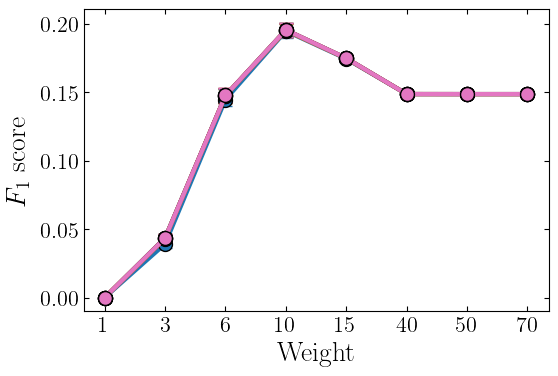

In [33]:
df = pd.DataFrame(clf.cv_results_)
C_arr = np.logspace(-3,3,num=7)

for C in C_arr:
    reg_par_fixed = df.loc[df['param_C'] == C]
    N_rows = reg_par_fixed.shape[0]
    weights = np.zeros(N_rows)
    means = np.zeros(N_rows)
    stds = np.zeros(N_rows)

    for i in range(N_rows):
        row = reg_par_fixed.iloc[i]
        w = row['param_class_weight']
        weights[i] = w[1]
        scores = row.loc['split0_test_score':'split4_test_score']
        means[i] = np.mean(scores)
        stds[i] = np.std(scores)

    x = np.arange(0,N_rows)
    plt.errorbar(x,means,yerr=stds,marker='o',capsize=5,lw=3,mec='k',ms=10)
    x_tick_locs = np.arange(0,N_rows)

    plt.xticks(x_tick_locs,["%d" %w for w in weights])
    
plt.xlabel('Weight')
plt.ylabel(r'$F_1$ score')

In [38]:
print(clf.best_score_,clf.best_params_)

0.1955654764800227 {'C': 100.0, 'class_weight': {0: 1, 1: 10}}


In [61]:
model=LogisticRegression(verbose=True,max_iter=10000,class_weight={0: 1, 1: 10},C=100)
model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=100, class_weight={0: 1, 1: 10}, max_iter=10000,
                   verbose=True)

In [62]:
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

In [63]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

cm = metrics.confusion_matrix(y_test,predicted)
print(cm)

0.7350907779247324
              precision    recall  f1-score   support

         0.0       0.94      0.76      0.84     30623
         1.0       0.13      0.40      0.19      2645

    accuracy                           0.74     33268
   macro avg       0.53      0.58      0.52     33268
weighted avg       0.87      0.74      0.79     33268

[[23393  7230]
 [ 1583  1062]]


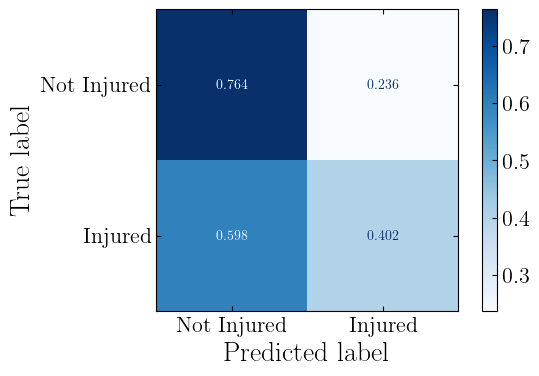

In [64]:
class_names = ['Not Injured','Injured']
disp = sklearn.metrics.plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true',values_format='.3f')

disp.ax_

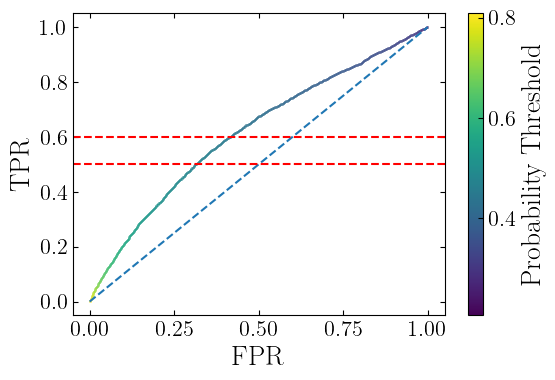

In [65]:
from matplotlib.collections import LineCollection

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs[:,1])

fig = plt.figure()

# plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='dashed')

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.axhline(y=0.5,color='r',linestyle='dashed')
plt.axhline(y=0.6,color='r',linestyle='dashed')

points = np.array([fpr, tpr]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

norm = plt.Normalize(thresholds.min(), thresholds[np.where(tpr<0.01)[0][-1]])
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(thresholds)
lc.set_linewidth(2)
line = plt.gca().add_collection(lc)
cb = fig.colorbar(line, ax=plt.gca())
cb.set_label('Probability Threshold')

# plt.axis([0,0.1,0,0.1])

In [56]:
metrics.roc_auc_score(y_test,probs[:,1])

0.618825638981585

### Try recursive feature elimination

In [74]:
X

,Unnamed: 0,Height_[cm],Weight_[kg],Age,MP_Av7,FG_Av7,FGA_Av7,FG_per_Av7,3P_Av7,3PA_Av7,...,Power_Forward_and_Small_Forward_and_Shooting_Guard,Shooting_Guard,Small_Forward,Small_Forward_and_Shooting_Guard,Big,Guard,Wing,Left,Left_Right,Right
0,0,196,95,28.041068,32.983333,3.000000,14.000000,0.214286,1.000000,5.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,188,79,29.536619,19.900000,2.000000,5.000000,0.400000,1.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,208,111,35.314853,16.550000,3.000000,5.000000,0.600000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3,211,106,29.602327,31.366667,6.000000,11.000000,0.545455,1.000000,2.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,213,120,31.506502,19.666667,5.000000,10.000000,0.500000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,5,206,113,33.169747,30.716667,4.000000,11.000000,0.363636,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,6,190,86,24.676249,25.750000,3.000000,6.000000,0.500000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,7,190,85,27.490075,29.066667,2.000000,8.000000,0.250000,0.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,8,211,118,26.982888,16.700000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,9,183,86,31.720055,30.566667,4.000000,13.000000,0.307692,3.000000,7.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [76]:
from sklearn.feature_selection import RFECV

y = injs['Assoc_inj']
X = injs.drop(columns=['Was_Injured','Dist_Feet_Av_7','Dist_Feet_Av_14','Dist_Feet_Av_21','Date','Name','Assoc_inj',\
                      'Unnamed: 0'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
log_reg = LogisticRegression(max_iter=10000,class_weight={0: 1, 1: 10},C=100)
rfe = RFECV(estimator=log_reg, step=3,scoring='f1',verbose=3,n_jobs=12)
rfe.fit(X_train, y_train)

Fitting estimator with 138 features.
Fitting estimator with 135 features.
Fitting estimator with 132 features.
Fitting estimator with 129 features.
Fitting estimator with 126 features.
Fitting estimator with 123 features.
Fitting estimator with 120 features.
Fitting estimator with 117 features.
Fitting estimator with 114 features.
Fitting estimator with 111 features.
Fitting estimator with 108 features.
Fitting estimator with 105 features.
Fitting estimator with 102 features.
Fitting estimator with 99 features.
Fitting estimator with 96 features.
Fitting estimator with 93 features.
Fitting estimator with 90 features.
Fitting estimator with 87 features.
Fitting estimator with 84 features.
Fitting estimator with 81 features.
Fitting estimator with 78 features.


RFECV(estimator=LogisticRegression(C=100, class_weight={0: 1, 1: 10},
                                   max_iter=10000),
      n_jobs=12, scoring='f1', step=3, verbose=3)

In [78]:
X.columns[rfe.support_]

Index(['Height_[cm]', 'Weight_[kg]', 'Age', 'MP_Av7', 'FG_Av7', '3P_Av7',
       '3PA_Av7', '3P_per_Av7', 'FT_Av7', 'FTA_Av7', 'FT_per_Av7', 'DRB_Av7',
       'AST_Av7', 'STL_Av7', 'BLK_Av7', 'TOV_Av7', 'FGA_Av14', '3P_Av14',
       '3PA_Av14', '3P_per_Av14', 'FT_Av14', 'FTA_Av14', 'FT_per_Av14',
       'ORB_Av14', 'DRB_Av14', 'AST_Av14', 'TOV_Av14', 'PF_Av14', 'GmSc_Av14',
       'N_games_14', 'MP_Av21', 'FG_Av21', 'FGA_Av21', '3P_Av21', '3PA_Av21',
       '3P_per_Av21', 'FTA_Av21', 'FT_per_Av21', 'ORB_Av21', 'TRB_Av21',
       'BLK_Av21', 'PF_Av21', 'GmSc_Av21', 'N_games_21', 'MP_b2b',
       'FG_per_b2b', 'FT_b2b', 'FTA_b2b', 'FT_per_b2b', 'ORB_b2b', 'BLK_b2b',
       'PTS_b2b', 'GmSc_b2b', 'b2b', 'N_prev_injs', 'ann_inj_rate', 'W_Av_7',
       'L_Av_7', 'Dist_Miles_Av_7', 'Dist_Miles_Off_Av_7',
       'Dist_Miles_Def_Av_7', 'Avg_Speed_Off_Av_7', 'Dist_Miles_Av_14',
       'Dist_Miles_Off_Av_14', 'Dist_Miles_Def_Av_14', 'Avg_Speed_Av_14',
       'Avg_Speed_Off_Av_14', 'Avg_Speed_Def

In [84]:
y = injs['Assoc_inj']
X = injs.drop(columns=['Was_Injured','Dist_Feet_Av_7','Dist_Feet_Av_14','Dist_Feet_Av_21','Date','Name','Assoc_inj',\
                      'Unnamed: 0'])

X = X[X.columns[rfe.support_]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
model = LogisticRegression(max_iter=10000,class_weight={0: 1, 1: 10},C=100)
model.fit(X_train,y_train)

LogisticRegression(C=100, class_weight={0: 1, 1: 10}, max_iter=10000)

In [87]:
coeffs = pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))
coeffs.loc[coeffs[1].abs().argsort()[::-1]]

,0,1
69,Dist_Miles_Av_21,[2.0096323817023665]
62,Dist_Miles_Av_14,[-1.6436831479641134]
70,Dist_Miles_Off_Av_21,[-1.1162710327264382]
58,Dist_Miles_Av_7,[0.9275741346585783]
63,Dist_Miles_Off_Av_14,[0.8529710698849013]
71,Dist_Miles_Def_Av_21,[-0.7320715724086796]
64,Dist_Miles_Def_Av_14,[0.6869930734874001]
60,Dist_Miles_Def_Av_7,[-0.45698143022033694]
54,N_prev_injs,[0.38571867321176867]
59,Dist_Miles_Off_Av_7,[-0.3671488570433618]


In [89]:
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

In [95]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

cm = metrics.confusion_matrix(y_test,predicted)
f1 = metrics.f1_score(y_test,predicted)
auc = metrics.roc_auc_score(y_test,probs[:,1])
print(cm)
print(f1)
print(auc)

0.7262233978598052
              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84     30580
         1.0       0.12      0.40      0.19      2688

    accuracy                           0.73     33268
   macro avg       0.53      0.58      0.51     33268
weighted avg       0.87      0.73      0.78     33268

[[23095  7485]
 [ 1623  1065]]
0.18953550453817403
0.6221083603896104


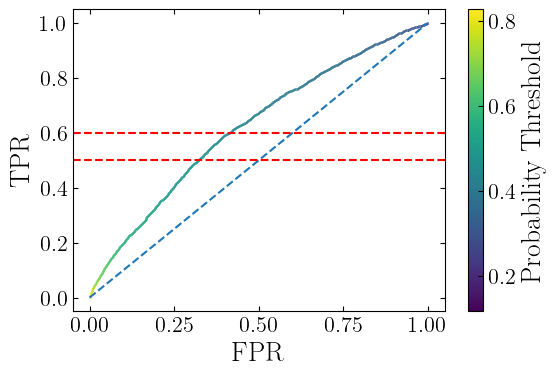

In [96]:
from matplotlib.collections import LineCollection

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs[:,1])

fig = plt.figure()

# plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='dashed')

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.axhline(y=0.5,color='r',linestyle='dashed')
plt.axhline(y=0.6,color='r',linestyle='dashed')

points = np.array([fpr, tpr]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

norm = plt.Normalize(thresholds.min(), thresholds[np.where(tpr<0.01)[0][-1]])
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(thresholds)
lc.set_linewidth(2)
line = plt.gca().add_collection(lc)
cb = fig.colorbar(line, ax=plt.gca())
cb.set_label('Probability Threshold')

# plt.axis([0,0.1,0,0.1])

### Try RandomForest

In [5]:
injs = injs.drop(columns='Unnamed: 0')

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
y = injs['Assoc_inj']
X = injs.drop(columns=['Was_Injured','Dist_Feet_Av_7','Dist_Feet_Av_14','Dist_Feet_Av_21','Date','Name','Assoc_inj'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = RandomForestClassifier(n_jobs=-1,verbose=True)
clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.3s finished


RandomForestClassifier(n_jobs=-1, verbose=True)

In [8]:
predicted = clf.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


In [9]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

cm = metrics.confusion_matrix(y_test,predicted)
print(cm)

print(metrics.f1_score(y_test, predicted))

0.9183900444871949
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     30532
         1.0       0.80      0.01      0.02      2736

    accuracy                           0.92     33268
   macro avg       0.86      0.51      0.49     33268
weighted avg       0.91      0.92      0.88     33268

[[30525     7]
 [ 2708    28]]
0.020209310718152292


In [10]:
coeffs = pd.DataFrame(zip(X.columns, np.transpose(clf.feature_importances_)))
sort_df = coeffs.loc[coeffs[1].abs().argsort()[::-1]].reset_index(drop=True)

In [11]:
sort_df

,0,1
0,Age,0.020143
1,ann_inj_rate,0.017319
2,N_prev_injs,0.016832
3,+/-_Av21,0.013375
4,+/-_Av14,0.012927
5,FG_per_Av21,0.012758
6,AST_Av21,0.012666
7,Avg_Speed_Off_Av_14,0.012481
8,GmSc_Av21,0.012435
9,+/-_Av7,0.012433


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X[sort_df[0][:30]], y, test_size=0.25)

In [110]:
params = [{'max_depth' : [None,50,30,20,15,10,5], 'min_samples_split' : [2,5,10,20,30,50]}]
       
model = RandomForestClassifier(n_jobs=12)

clf = model_selection.GridSearchCV(model,params,scoring='roc_auc',verbose=3,n_jobs=6)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 17.5min
[Parallel(n_jobs=6)]: Done 210 out of 210 | elapsed: 24.4min finished


GridSearchCV(estimator=RandomForestClassifier(n_jobs=12), n_jobs=6,
             param_grid=[{'max_depth': [None, 50, 30, 20, 15, 10, 5],
                          'min_samples_split': [2, 5, 10, 20, 30, 50]}],
             scoring='roc_auc', verbose=3)

In [111]:
print(clf.best_score_,clf.best_params_)

0.8535807295606765 {'max_depth': 50, 'min_samples_split': 2}


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X[sort_df[0][:30]], y, test_size=0.25)

In [30]:
clf = RandomForestClassifier(n_jobs=-1,max_depth=50,min_samples_split=2,verbose=True)
clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.7s finished


RandomForestClassifier(max_depth=50, n_jobs=-1, verbose=True)

In [31]:
predicted = clf.predict(X_test)
probs = clf.predict_proba(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


In [32]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

cm = metrics.confusion_matrix(y_test,predicted)
roc = metrics.roc_auc_score(y_test,probs[:,1])
print(cm)
print(roc)

0.9217566430203198
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     30585
         1.0       0.82      0.04      0.07      2683

    accuracy                           0.92     33268
   macro avg       0.87      0.52      0.52     33268
weighted avg       0.91      0.92      0.89     33268

[[30563    22]
 [ 2581   102]]
0.8864503103873765


Text(0.5, 1.0, 'ROC Curve for Random Forest, 7 day predicition window')

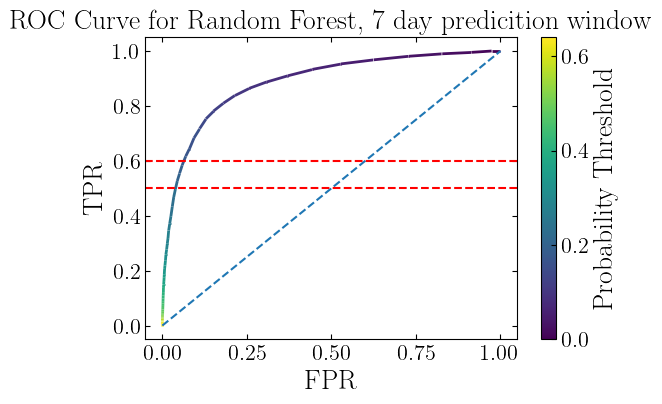

In [33]:
from matplotlib.collections import LineCollection

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs[:,1])

fig = plt.figure()

# plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='dashed')

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.axhline(y=0.5,color='r',linestyle='dashed')
plt.axhline(y=0.6,color='r',linestyle='dashed')

points = np.array([fpr, tpr]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

norm = plt.Normalize(thresholds.min(), thresholds[np.where(tpr<0.01)[0][-1]])
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(thresholds)
lc.set_linewidth(2)
line = plt.gca().add_collection(lc)
cb = fig.colorbar(line, ax=plt.gca())
cb.set_label('Probability Threshold')

plt.title('ROC Curve for Random Forest, 7 day predicition window')

# plt.axis([0,0.1,0,0.1])

In [148]:
np.savetxt('fpr_rf_best.txt',fpr)
np.savetxt('tpr_rf_best.txt',tpr)
np.savetxt('thresh_rf_best.txt',thresholds)

In [34]:
fig.savefig('roc_7_day.png',bbox_inches='tight',dpi=300)

### Look at just LeBron James

In [35]:
p_injs = injs.loc[injs['Name']=="LeBron James"]
p_injs = p_injs.sort_values(by=['Date']).reset_index(drop=True)

y_p = p_injs['Assoc_inj']
X_p = p_injs.drop(columns=['Was_Injured','Dist_Feet_Av_7','Dist_Feet_Av_14','Dist_Feet_Av_21'\
                           ,'Date','Name','Assoc_inj'])
X_p = X_p[sort_df[0][:30]]

predicted = clf.predict(X_p)
probs = clf.predict_proba(X_p)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


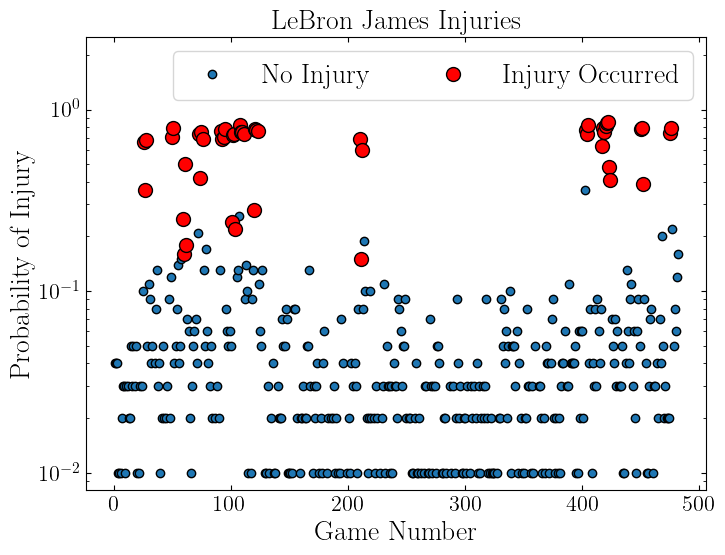

In [38]:
fig = plt.figure(figsize=(8,6))

plot_p = np.zeros((len(probs[:,1]),2))

plot_p[:,0] = np.arange(1,len(probs[:,1])+1)
plot_p[:,1] = probs[:,1]

inj_games = plot_p[np.where(y_p==1)]
non_inj_games = plot_p[np.where(y_p==0)]

plt.semilogy(non_inj_games[:,0],non_inj_games[:,1],marker='o',mec='k',linestyle=' ',label='No Injury')
plt.semilogy(inj_games[:,0],inj_games[:,1],marker='o',mec='k',color='r',linestyle=' ',ms=10,label='Injury Occurred')

plt.xlabel('Game Number')
plt.ylabel('Probability of Injury')

plt.title('LeBron James Injuries')
plt.ylim(8e-3,2.5e0)

plt.gca().legend(loc='best',frameon=True,ncol=2)

In [39]:
fig.savefig('LBJ_inj_7day.png',bbox_inches='tight',dpi=300)

### Look at just Kawhi Leonard

In [157]:
p_injs = injs.loc[injs['Name']=="Kawhi Leonard"]
p_injs = p_injs.sort_values(by=['Date']).reset_index(drop=True)

y_p = p_injs['Assoc_inj']
X_p = p_injs.drop(columns=['Was_Injured','Dist_Feet_Av_7','Dist_Feet_Av_14','Dist_Feet_Av_21'\
                           ,'Date','Name','Assoc_inj'])
X_p = X_p[sort_df[0][:30]]

predicted = clf.predict(X_p)
probs = clf.predict_proba(X_p)

Text(0, 0.5, 'Probability of Injury')

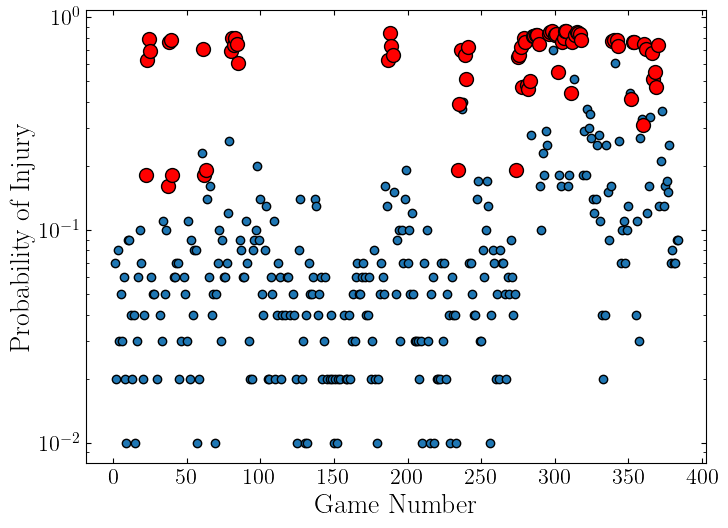

In [158]:
plt.figure(figsize=(8,6))

plot_p = np.zeros((len(probs[:,1]),2))

plot_p[:,0] = np.arange(1,len(probs[:,1])+1)
plot_p[:,1] = probs[:,1]

inj_games = plot_p[np.where(y_p==1)]
non_inj_games = plot_p[np.where(y_p==0)]

plt.semilogy(non_inj_games[:,0],non_inj_games[:,1],marker='o',mec='k',linestyle=' ',label='No Injury')
plt.semilogy(inj_games[:,0],inj_games[:,1],marker='o',mec='k',color='r',linestyle=' ',ms=10,label='Injury Occurred')

plt.xlabel('Game Number')
plt.ylabel('Probability of Injury')

# plt.gca().legend(loc='best',frameon=False)

### To find the number of games added, we need an estimate of the number of games associated with the same injury, as resting a player for those games only prevents the one injury (presuming that resting the player for that game really does prevent the injury)

In [146]:
N = len(y_test)
N_neg = len(y_test.loc[y_test==0])
N_pos = N - N_neg

TP = N_pos*tpr[ind]
FP = N_neg*fpr[ind]
FN = N_pos*(1-tpr[ind])
TN = N_neg*(1-fpr[ind])

print(TP,FP,FN,TN)
games_added = 4.889

net_games = games_added*TP - FP
print(net_games)

[88.] [12.] [2625.] [30543.]
[418.232]


In [143]:
TP

array([88.])

In [133]:
len(y_test.loc[y_test==1])

2713

In [ ]:
TP = 

In [126]:
pos = y_test.iloc[np.where(probs[:,1]>0.5)]
tpr = pos.

In [128]:
pos.loc[pos==1]

117281    1.0
47572     1.0
94240     1.0
90215     1.0
32569     1.0
59961     1.0
113959    1.0
116962    1.0
24147     1.0
56008     1.0
60682     1.0
36537     1.0
123572    1.0
127931    1.0
99221     1.0
47394     1.0
103961    1.0
9322      1.0
117474    1.0
125455    1.0
103148    1.0
21779     1.0
95617     1.0
129171    1.0
83664     1.0
128260    1.0
42450     1.0
84845     1.0
126895    1.0
100896    1.0
         ... 
86141     1.0
42552     1.0
67719     1.0
106509    1.0
112246    1.0
3320      1.0
124309    1.0
81063     1.0
30762     1.0
9195      1.0
94170     1.0
23026     1.0
131600    1.0
21528     1.0
104694    1.0
70743     1.0
84193     1.0
99996     1.0
8315      1.0
115087    1.0
126430    1.0
37238     1.0
2276      1.0
36468     1.0
3420      1.0
100542    1.0
130552    1.0
32578     1.0
106445    1.0
48821     1.0
Name: Assoc_inj, Length: 88, dtype: float64